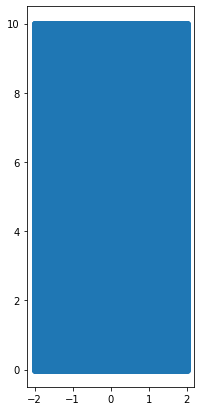

In [6]:
#!/usr/bin/env python
# coding: utf-8

%matplotlib inline

import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D


try:
    os.listdir(base_dir)
except:
    base_dir = os.getcwd()
data_dir = '/gpfs/cwfs/sdutta/hfm_data/Flower/'
fig_dir  = os.path.join(base_dir,'../figures/')


## Runtime Options
visualize = True
save_data = True


### Create a uniform mesh
x = np.linspace(-2,2,200)
y = np.linspace(0,10,500)
x_2d, y_2d = np.meshgrid(x,y)

def plot_mesh(x_2d,y_2d):
    fig = plt.figure(figsize=(3,7))
    plt.scatter(x_2d, y_2d)
    segs1 = np.stack((x_2d,y_2d), axis=2)
    segs2 = segs1.transpose(1,0,2)
    plt.gca().add_collection(LineCollection(segs1))
    plt.gca().add_collection(LineCollection(segs2))


if visualize:
    plot_mesh(x_2d,y_2d)




********Generating snapshots for variable pulse sizes*******

Generating solutions for Sigma = 0.5000, Speed = 0.05
Generating solutions for Sigma = 0.2000, Speed = 0.05
Generating solutions for Sigma = 0.1000, Speed = 0.05


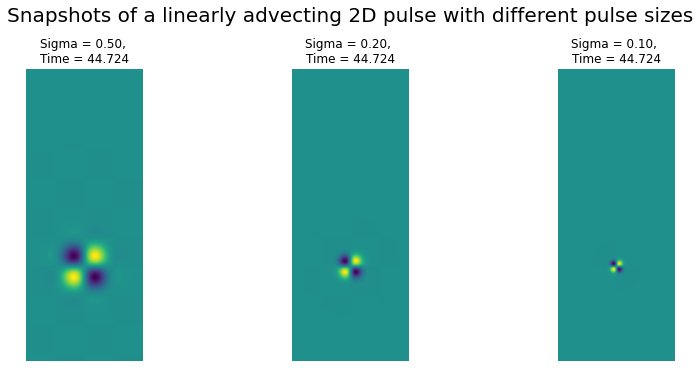

In [7]:
## Analytic function to generate a Gaussian pulse moving with time

def Gaussian2D(x, y, t, c, **kwargs):

    try:
        x0 = kwargs['x0']
    except:
        x0 = 0
    try:
        y0 = kwargs['y0']
    except:
        y0 = 1

    try:
        amp = kwargs['amp']
    except:
        amp = 50.0

    try:
        sigma_x = kwargs['sigma_x']
    except:
        sigma_x = 5

    try:
        sigma_y = kwargs['sigma_y']
    except:
        sigma_y = 5
    
    k = 1
#     A = 1000
#     R = np.sqrt( (x-x0)**2 + (y- c*t - y0)**2 )
    R_x = (x - x0)
    R_y = (y - c*t - y0)
    
    arg = (x - x0)**2/(2*sigma_x**2) + (y - c*t - y0)**2/(2*sigma_y**2)
    out = amp*np.sin(k*np.pi*R_x)*np.sin(k*np.pi*R_y)*np.exp(-arg)

    return out

x0 = 0; y0 = 1


print("\n********Generating snapshots for variable pulse sizes*******\n")
## Generate parametric snapshots for pulse
## of varying sizes
speed = .05
flower = {}; time = {}
sigma_list = [.5, .2, .1]  #
for ix,sigma in enumerate(sigma_list):
    time[ix] = np.linspace(0,100,200 )
    flower[ix] = np.zeros((x_2d.shape[0],x_2d.shape[1],time[ix].size))
    for nt in np.arange(time[ix].size):
        flower[ix][:,:,nt] = Gaussian2D(x_2d, y_2d, time[ix][nt], c=speed, 
                                        sigma_x = sigma, sigma_y = sigma)
    print("Generating solutions for Sigma = %.4f, Speed = %.2f"%(sigma, speed))

    if save_data:
        np.savez_compressed(data_dir+'Gaussian2d_flower_500x200_c%.2f_sigma%.4f'%(speed,sigma),
                    flower = flower[ix], x = x_2d, y = y_2d, t = time[ix], c = speed, sigma = sigma)

if visualize:
    nt=89
    fig, ax = plt.subplots(nrows=1,ncols=len(sigma_list),figsize=(11,5),constrained_layout=True)
    for ix,sigma in enumerate(sigma_list):
        ax[ix].imshow(flower[ix][:,:,nt],
                   extent=[min(x),max(x),min(y),max(y)],
                   origin="lower")
        ax[ix].set_title('Sigma = %.2f, \nTime = %.3f'%(sigma,time[ix][nt]))
        ax[ix].axis('off')
    plt.suptitle("Snapshots of a linearly advecting 2D pulse with different pulse sizes",fontsize=20)
    # plt.show()
    fig.savefig(fig_dir+'Pulse2D_variable_size.png',dpi=300,bbox_inches='tight')




In [8]:
flower_shift = {}
Nt = {}
for ix,sigma in enumerate(sigma_list):
    
    Nt[ix] = time[ix].size
    tmp = flower[ix][:,:,int(Nt[ix]//2)]
    flower_shift[ix] = np.repeat(tmp[:,:,np.newaxis], Nt[ix], axis=2);

    print("Saving shift solutions for Sigma = %.4f, Speed = %.2f"%(sigma, speed))

    if save_data:
        np.savez_compressed(data_dir+'ShiftedGaussian2d_flower_500x200_c%.2f_sigma%.4f'%(speed,sigma),
                        flower = flower_shift[ix], x = x_2d, y = y_2d, t = time[ix], c = speed, sigma = sigma)

    

Saving shift solutions for Sigma = 0.5000, Speed = 0.05
Saving shift solutions for Sigma = 0.2000, Speed = 0.05
Saving shift solutions for Sigma = 0.1000, Speed = 0.05


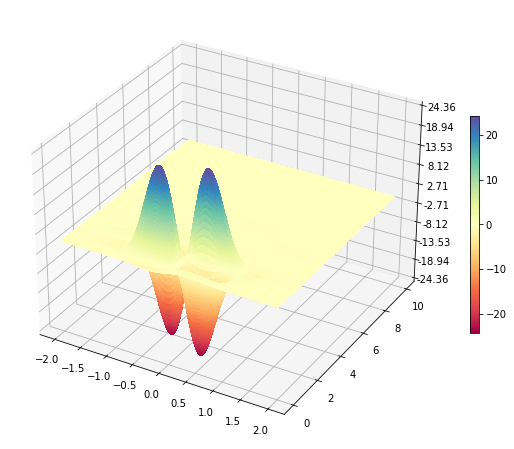

In [9]:

%matplotlib inline

fig, ax = plt.subplots(figsize=(10,8),subplot_kw={"projection": "3d"})

nt = 15

# Plot the surface.
surf = ax.plot_surface(x_2d, y_2d, flower[0][:,:,nt], 
                       cmap=cm.Spectral, 
                       rstride=1, cstride=1,
                       linewidths=0.5, antialiased=False)
# ax.contour(x_2d, y_2d, flower[0][:,:,nt], 5, 
#            linewidths=3, cmap="summer", linestyles="solid", offset=+1)
# ax.contour(x_2d, y_2d, flower[0][:,:,nt], 5, 
#            linewidths=3, colors="k", linestyles="solid")


# Customize the z axis.
ax.set_zlim(flower[0][:,:,nt].min(), flower[0][:,:,nt].max())
ax.zaxis.set_major_locator(LinearLocator(10))

# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=25)


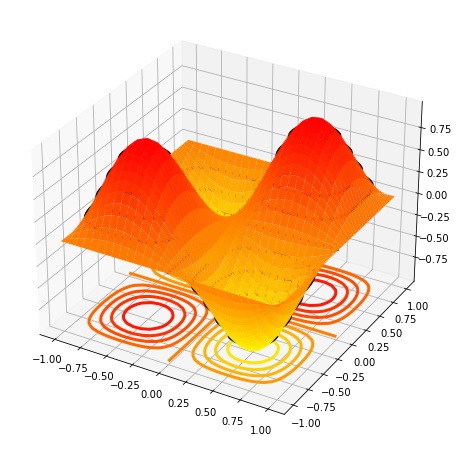

In [5]:
## Visualization example code

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
X, Y = np.mgrid[-1:1:30j, -1:1:50j]
Z = np.sin(np.pi*X)*np.sin(np.pi*Y)
ax.plot_surface(X, Y, Z, cmap="autumn_r", linewidths=0.5, rstride=1, cstride=1)
ax.contour(X, Y, Z, 10, linewidths=3, cmap="autumn_r", linestyles="solid", offset=-1)
ax.contour(X, Y, Z, 10, linewidths=3, colors="k", linestyles="solid")
plt.show()